### Mục mới 

In [1]:
from keras.datasets import mnist 
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
test_images.shape

(10000, 28, 28)

In [4]:
train_labels.shape

(60000,)

In [5]:
test_labels.shape

(10000,)

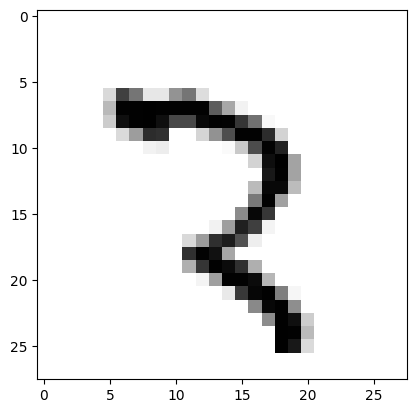

So: 3


In [6]:
import matplotlib.pyplot as plt
digit=train_images[500]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print('So:',train_labels[500])

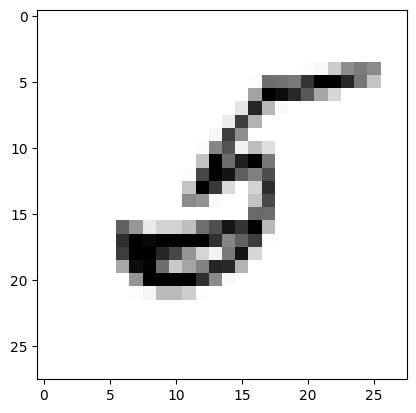

So: 5


In [7]:
import matplotlib.pyplot as plt
digit=train_images[1111]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print('So:',train_labels[1111])

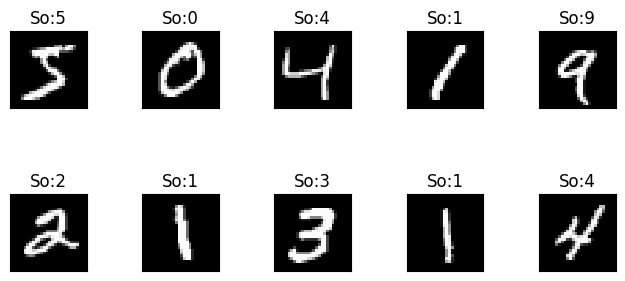

In [8]:
for i in range (10):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i],cmap='gray',interpolation='none')
  plt.title('So:{}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [9]:
from keras.models import Sequential
from keras.layers import Dense 
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(28*28,)))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [10]:
X=test_images
Y=test_labels
train_images=train_images.reshape(60000,28*28)
train_images=train_images.astype('float32')/255
test_images=test_images.reshape(10000,28*28)
test_images=test_images.astype('float32')/255


In [11]:
train_images.shape


(60000, 784)

In [12]:
train_labels.shape

(60000,)

In [13]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10) 

In [14]:
train_labels.shape

(60000, 10)

In [15]:
test_labels.shape

(10000, 10)

In [16]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=10,batch_size=128)
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('Mat mat:',test_loss)
print('Do chinh xac :',test_acc)

Epoch 1/10
469/469 [==============================] - 12s 23ms/step - loss: 0.2620 - accuracy: 0.9251
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 0.1069 - accuracy: 0.9682
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0705 - accuracy: 0.9790
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0508 - accuracy: 0.9841
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0376 - accuracy: 0.9891
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0285 - accuracy: 0.9914
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0217 - accuracy: 0.9937
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0166 - accuracy: 0.9954
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0120 - accuracy: 0.9970
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0655 - accuracy: 0

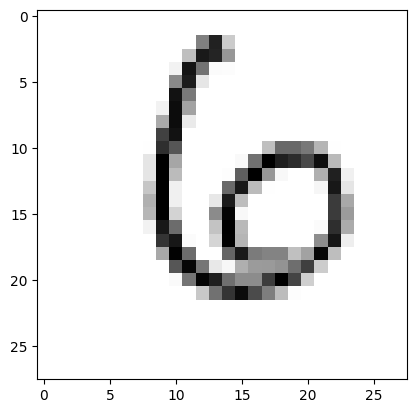

So: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [17]:
digit=X[100]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print('So:',train_labels[100])

In [18]:
x_pred=X[1000].reshape(1,28*28)
x_pred=x_pred.astype('float32')/255
y_pred=model.predict(x_pred)
print(y_pred)

1/1 [==============================] - 0s 74ms/step
[[1.2277157e-08 4.8337199e-07 8.8902436e-12 3.7187905e-04 4.6487007e-06
  6.0023638e-08 3.8800110e-15 1.2732637e-05 1.8972077e-09 9.9961025e-01]]


In [19]:
x_pred=X[100].reshape(1,28*28)
x_pred=x_pred.astype('float32')/255
y_pred=model.predict(x_pred)
print(y_pred)

1/1 [==============================] - 0s 33ms/step
[[2.1427961e-06 2.3243221e-08 2.7893515e-08 9.9277864e-10 1.4984565e-07
  4.4780720e-07 9.9999535e-01 1.5180751e-08 1.9454269e-06 2.9622165e-09]]


In [20]:
x_pred=X[10].reshape(1,28*28)
x_pred=x_pred.astype('float32')/255
y_pred=model.predict(x_pred)
print(y_pred)

1/1 [==============================] - 0s 23ms/step
[[1.0000000e+00 7.1973948e-14 4.4065942e-09 1.7626682e-13 1.7781625e-15
  1.6462163e-12 2.2172235e-10 6.5589562e-10 3.1675727e-15 4.7986343e-10]]


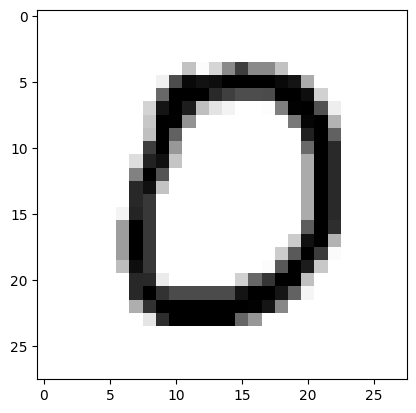

So: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [21]:
digit=X[10]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print('So:',train_labels[10])

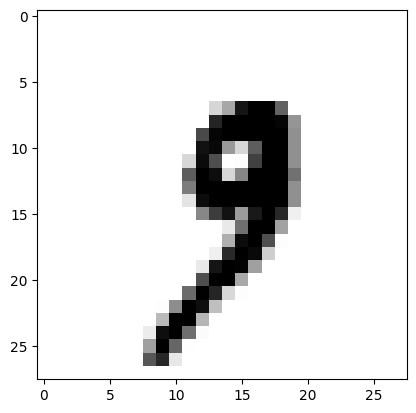

So: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [22]:
digit=X[1000]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print('So:',train_labels[1000])

In [23]:
import numpy as np
np.argmax(model.predict(x_pred),axis=1)

1/1 [==============================] - 0s 20ms/step


array([0])